In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


samsung_df = yf.download('005930.KS',
                      start='2019-01-01',
                      end='2021-03-31',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2019-01-02,38750.0
2019-01-03,37600.0
2019-01-04,37450.0
2019-01-07,38750.0
2019-01-08,38100.0
...,...
2021-03-24,81000.0
2021-03-25,81200.0
2021-03-26,81500.0


In [36]:
samsung_train_df = samsung_df[:547]
samsung_train_df

,price
day,
2019-01-02,38750.0
2019-01-03,37600.0
2019-01-04,37450.0
2019-01-07,38750.0
2019-01-08,38100.0
...,...
2021-03-17,82300.0
2021-03-18,82900.0
2021-03-19,81900.0


In [37]:
samsung_test_df = samsung_df[547:]
samsung_test_df

,price
day,
2021-03-24,81000.0
2021-03-25,81200.0
2021-03-26,81500.0
2021-03-29,81600.0
2021-03-30,82200.0


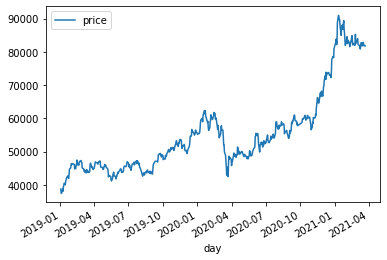

In [38]:
samsung_train_df.plot()
plt.show()

In [39]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(samsung_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

/home/owen/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  546
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4555.129
Method:                       css-mle   S.D. of innovations           1011.839
Date:                Tue, 20 Apr 2021   AIC                           9122.258
Time:                        22:46:43   BIC                           9148.074
Sample:                             1   HQIC                          9132.350
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0742     44.295      1.763      0.078      -8.742     164.891
ar.L1.D.y     -1.5663      0.019    -81.913      0.000      -1.604      -1.529
ar.L2.D.y     -0.9463      0.016    -57.851      0.0

/home/owen/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
